In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [ ]:
# part 2
df = pd.read_csv("cleaned_ebay_deals.csv")
print("Loaded rows:", len(df))

Loaded rows: 3975


In [ ]:
df.dropna(subset=['price', 'original_price', 'shipping', 'discount_percentage'], inplace=True)

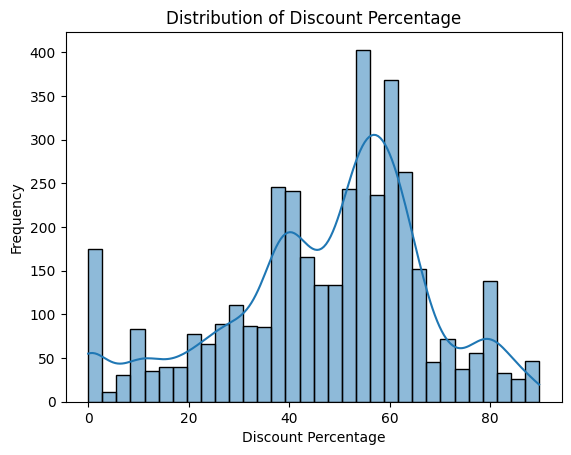

In [ ]:
sns.histplot(df['discount_percentage'], kde=True)
plt.title("Distribution of Discount Percentage")
plt.xlabel("Discount Percentage")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# part 3

def categorize_discount(value):
    if value <= 10:
        return 'Low'
    elif value <= 30:
        return 'Medium'
    else:
        return 'High'

In [ ]:
# 2. Count the number of samples in each category.
df['discount_bin'] = df['discount_percentage'].apply(categorize_discount)
print (df['discount_bin'].value_counts())

discount_bin
High      3226
Medium     488
Low        261
Name: count, dtype: int64


In [ ]:
# Balance the dataset by randomly under-sampling overrepresented categories so that all bins have equal size.
min_count = df['discount_bin'].value_counts().min()

balanced_df = (
    df.groupby('discount_bin')
    .apply(lambda x: x.sample(min_count, random_state=42))
    .reset_index(drop=True)
)

print(balanced_df['discount_bin'].value_counts())

discount_bin
High      261
Low       261
Medium    261
Name: count, dtype: int64


<ipython-input-9-df85311209bf>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min_count, random_state=42))


In [ ]:
# 4. Once balanced, remove the discount_bin column.
balanced_df.drop(columns=['discount_bin'], inplace=True)

In [ ]:
# 5. The model should be trained to predict the original continuous discount_percentage values.
X = balanced_df[['price', 'original_price']]
y = balanced_df['discount_percentage']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 9.83
Mean Squared Error (MSE): 160.82
Root Mean Squared Error (RMSE): 12.68
R² Score: 0.66


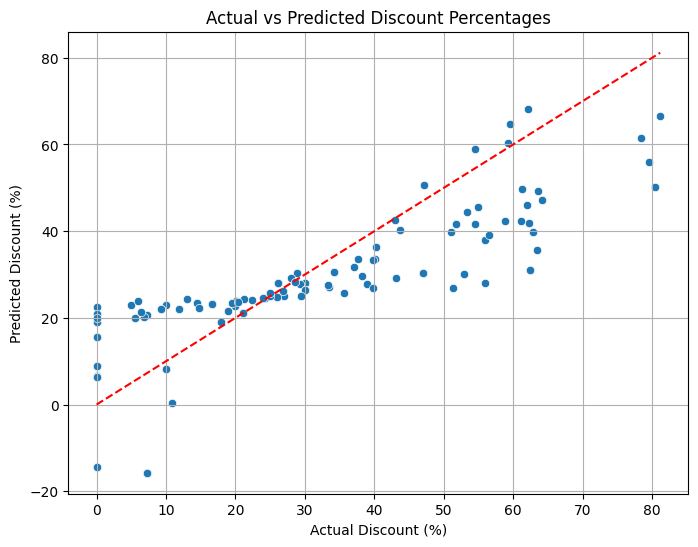

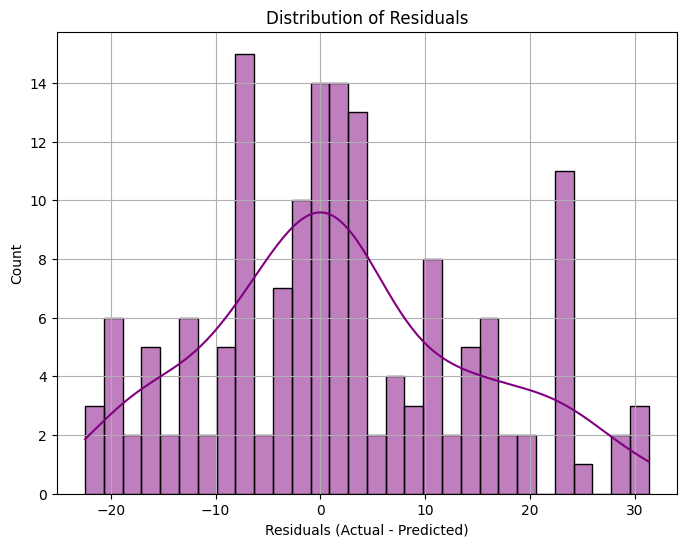

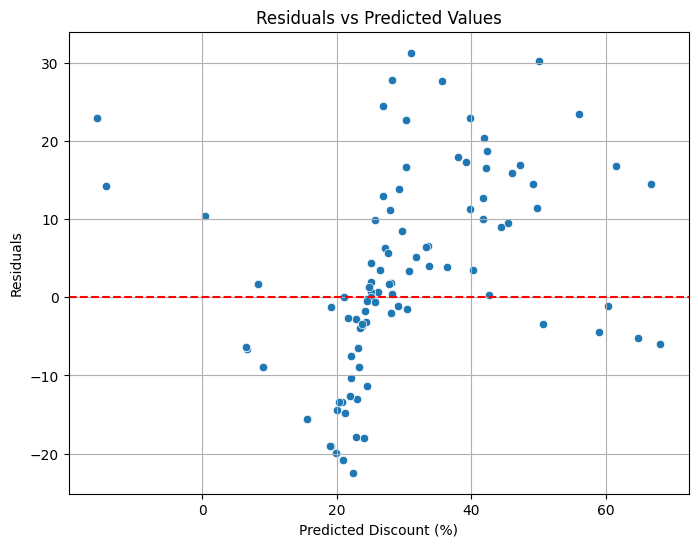

                       MAE         MSE       RMSE  R² Score
Model Evaluation  9.834973  160.819634  12.681468  0.660694


In [ ]:
# 1. Scatter plot: actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Discount (%)")
plt.ylabel("Predicted Discount (%)")
plt.title("Actual vs Predicted Discount Percentages")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.grid(True)
plt.show()

# 2. Residual plot
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color="purple")
plt.xlabel("Residuals (Actual - Predicted)")
plt.title("Distribution of Residuals")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Discount (%)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.grid(True)
plt.show()

# Display metrics in table format
metrics = {
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "R² Score": r2
}
metrics_df = pd.DataFrame(metrics, index=["Model Evaluation"])
print(metrics_df)


In [ ]:
df_no_discount = df.drop(columns=['discount_percentage'])

sample_df = df_no_discount[['price', 'original_price', 'shipping', 'title']].sample(20, random_state=42)

sample_features = sample_df[['price', 'original_price']] 
predicted_discounts = model.predict(sample_features)

sample_df['Predicted Discount (%)'] = predicted_discounts.round(2)

print(sample_df[['title', 'price', 'original_price', 'shipping', 'Predicted Discount (%)']])

                                                  title    price  \
2355         Apple iPhone 14 128GB Unlocked - Excellent   340.95   
495   HP ENVY Laptop Intel Core Ultra 7 155U RTX 305...   769.99   
3893  Apple iPhone 14 Pro Max 256GB Unlocked Very Go...   559.99   
3154  Samsung Galaxy S21 5G SM-G991U 128GB 256GB Unl...   161.95   
1178  Apple iPhone 16 Pro Max 256GB Unlocked Excelle...   964.99   
1767  Samsung Galaxy S22 Ultra 5G S908U 128GB Unlock...   332.99   
1904  Acer PredatorNeo Laptop 16 16GB 1TB NVIDIA GeF...   899.99   
1723         Apple iPhone 13 128GB Unlocked - Excellent   285.95   
2414  Samsung Galaxy S22 Ultra 5G S908U 128GB Unlock...   332.99   
3662         Samsung Galaxy Watch4 44mm R870 GPS - Good    36.99   
3721  Samsung Galaxy S21 Ultra 5G 128GB G998U Unlock...   259.99   
2412     Apple iPhone 13 Pro 128GB Unlocked - Excellent   357.95   
511   Apple iPhone 14 Pro A2650 256GB Unlocked Very ...   439.99   
3063     Apple iPhone 13 Pro 128GB Unlocked - Ex